# Support Vector Machine

## SVM with RBF kernel

In [1]:
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [2]:
def load_data():
    (Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()
    print("Xtrain shape: ", Xtrain.shape)
    print("Ytrain shape: ", Ytrain.shape)
    print("Xtest shape: ", Xtest.shape)
    print("Ytest shape: ", Ytest.shape)
    return Xtrain, Ytrain, Xtest, Ytest

In [3]:
def prepare_data(Xtrain, Xtest):
    Xtrain = Xtrain/255
    Xtest = Xtest/255
    plt.imshow(Xtrain[2], cmap='gray')
    plt.show()
    Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1]*Xtrain.shape[2]))
    Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1]*Xtest.shape[2]))
    print("Xtrain after reshaping", Xtrain.shape)
    print("Xtest after reshaping", Xtest.shape)
    scalar = StandardScaler()
    Xtrain = scalar.fit_transform(Xtrain)
    Xtest = scalar.fit_transform(Xtest)
    return Xtrain, Xtest

In [4]:
def train(Xtrain, Ytrain, g):
    model = SVC(C=1, kernel="rbf", gamma=g)
    model.fit(Xtrain, Ytrain)
    return model

In [5]:
def predict(model, Xtest, Ytest):
    prediction = model.predict(Xtest)
    print("Accuracy is: ", accuracy_score(y_true=Ytest, y_pred=prediction))
    return accuracy_score(y_true=Ytest, y_pred=prediction)

Xtrain shape:  (60000, 28, 28)
Ytrain shape:  (60000,)
Xtest shape:  (10000, 28, 28)
Ytest shape:  (10000,)


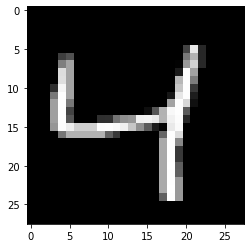

Xtrain after reshaping (60000, 784)
Xtest after reshaping (10000, 784)
Accuracy is:  0.9647
Accuracy is:  0.9648
Accuracy is:  0.8531


In [8]:
Xtrain, Ytrain, Xtest, Ytest = load_data()
Xtrain, Xtest = prepare_data(Xtrain, Xtest)
Gamma = [0.00097, 0.001, 0.01]
accuracy = list()
for g in Gamma:
    model = train(Xtrain, Ytrain, g)
    accuracy.append(predict(model, Xtest, Ytest))

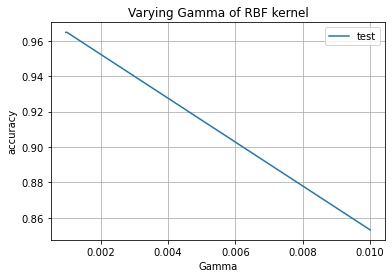

In [9]:
plt.plot(Gamma, accuracy)
plt.title('Varying Gamma of RBF kernel')
plt.ylabel('accuracy')
plt.xlabel('Gamma')
plt.legend(['test'], loc='upper right')
plt.grid()
plt.show()

# SVM with RBF kernel and PCA

In [10]:
def prepare_PCA_data(Xtrain, Xtest):
    pca = PCA(n_components=0.97)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xtest_pca = pca.transform(Xtest)
    return Xtrain_pca, Xtest_pca

In [11]:
def train_PCA(Xtrain_pca, Ytrain, g):
    pca_model = SVC(C=1, kernel="rbf", gamma=g)
    pca_model.fit(Xtrain_pca, Ytrain)
    return pca_model

In [12]:
def predict_PCA(pca_model, Xtest_pca, Ytest):
    pred_pca = pca_model.predict(Xtest_pca)
    print("Accuracy with PCA is: ", accuracy_score(y_true=Ytest, y_pred=pred_pca))
    return accuracy_score(y_true=Ytest, y_pred=pred_pca)

In [13]:
Xtrain_pca, Xtest_pca = prepare_PCA_data(Xtrain, Xtest)
Gamma = [0.00097, 0.001, 0.01]
accuracy1 = list()
for g in Gamma:
    pca_model = train_PCA(Xtrain_pca, Ytrain, g)
    accuracy1.append(predict_PCA(pca_model, Xtest_pca, Ytest))

Accuracy with PCA is:  0.9651
Accuracy with PCA is:  0.9655
Accuracy with PCA is:  0.8718


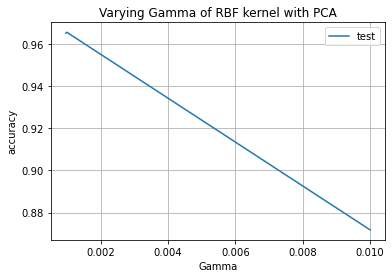

In [20]:
plt.plot(Gamma, accuracy1)
plt.title('Varying Gamma of RBF kernel with PCA')
plt.ylabel('accuracy')
plt.xlabel('Gamma')
plt.legend(['test'], loc='upper right')
plt.grid()
plt.show()

# SVM with RBF kernel and LDA

In [15]:
def prepare_LDA_data(Xtrain, Ytrain, Xtest):
    lda = LDA(n_components=9)
    Xtrain_lda = lda.fit_transform(Xtrain, Ytrain)  
    Xtest_lda = lda.transform(Xtest)
    return Xtrain_lda, Xtest_lda

In [16]:
def train_LDA(Xtrain_lda, Ytrain, g):
    lda_model = SVC(C=1,kernel="rbf", gamma=g)
    lda_model.fit(Xtrain_lda, Ytrain)
    return lda_model

In [17]:
def predict_LDA(lda_model, Xtest_lda, Ytest):
    pred_lda = lda_model.predict(Xtest_lda)
    print("Accuracy with LDA is: ", accuracy_score(y_true=Ytest, y_pred=pred_lda))
    return accuracy_score(y_true=Ytest, y_pred=pred_lda)

In [18]:
Xtrain_lda, Xtest_lda = prepare_LDA_data(Xtrain, Ytrain, Xtest)
Gamma = [0.00097, 0.001, 0.01]
accuracy2 = list()
for g in Gamma:
    lda_model = train_LDA(Xtrain_lda, Ytrain, g)
    accuracy2.append(predict_LDA(lda_model, Xtest_lda, Ytest))

Accuracy with LDA is:  0.8916
Accuracy with LDA is:  0.8914
Accuracy with LDA is:  0.9052


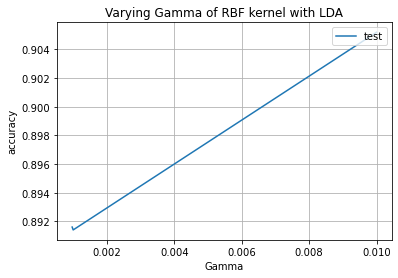

In [21]:
plt.plot(Gamma, accuracy2)
plt.title('Varying Gamma of RBF kernel with LDA')
plt.ylabel('accuracy')
plt.xlabel('Gamma')
plt.legend(['test'], loc='upper right')
plt.grid()
plt.show()